### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
df_train=pd.read_csv("titanic.csv")
df_train.shape

(891, 12)

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### check ferquencies of categorial column

In [4]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df_train.Survived.value_counts(1) #normalised=True

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [6]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### check mising values

In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Retain relevant feature

In [9]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Drop irrevent feature

In [10]:
df_train=df_train.drop(["PassengerId",'Name', 'Ticket','Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Missing Value Imputation

In [11]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [12]:
def age_appox(cols):
    Age   =cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

In [13]:
df_train['Age']=df_train[['Age','Pclass']].apply(age_appox, axis=1)

In [14]:
#check null again
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Encoding the text values in categorical form

In [16]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [17]:
#One_hot_Encoding
df_train_dummied=pd.get_dummies(df_train, columns=["Sex","Embarked"], drop_first=True)

In [18]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### checking for independance between column

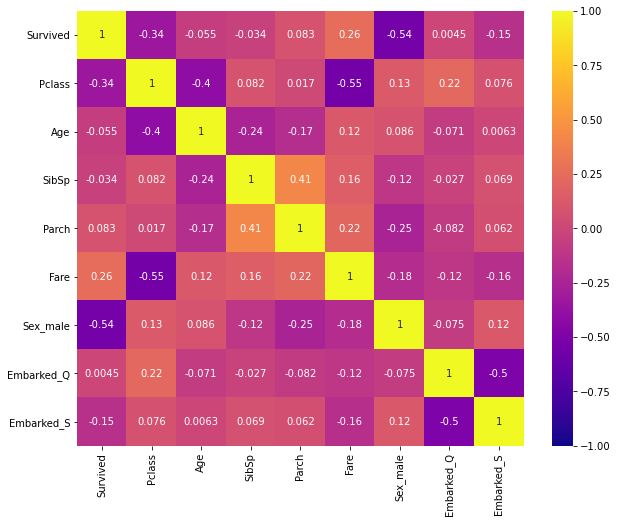

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train_dummied.corr(),
           vmin=-1,
           vmax=1,
           cmap='plasma',
           annot=True);

In [20]:
#create X and y
X=df_train_dummied.drop("Survived", axis=1)
y=df_train_dummied["Survived"]

In [21]:
#split the data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=11)

In [22]:
#check the shape
df_train_dummied.shape,X_train.shape, X_test.shape

((889, 9), (622, 8), (267, 8))

In [23]:
#create logistic regression object
LogReg=LogisticRegression()
LogReg.fit(X_train,y_train)

LogisticRegression()

In [24]:
#test prdiction
y_pred=LogReg.predict(X_test)

In [25]:
#train prediction
pred_train=LogReg.predict(X_train)

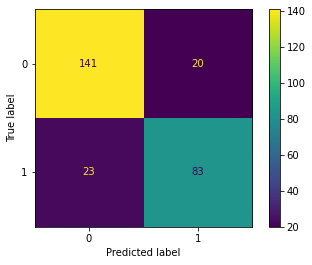

In [26]:
#Confuson matrix for X_test, y_test
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LogReg, X_test, y_test)
#plt.grid();

In [27]:
#Acc of test data
accuracy_score(y_test, y_pred)

0.8389513108614233

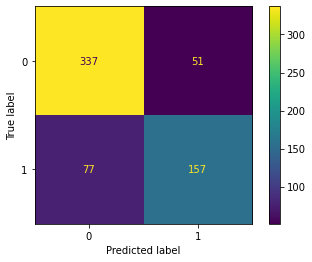

In [28]:
#Confuson matrix for X_train, y_train
plot_confusion_matrix(LogReg, X_train, y_train);

In [29]:
#Acc of train data 
accuracy_score(y_train, pred_train)

0.7942122186495176

In [30]:
#classification_report of test data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       161
           1       0.81      0.78      0.79       106

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [31]:
# Beta coefficient
LogReg.coef_

array([[-1.03726876, -0.03573297, -0.27077522, -0.16739864,  0.00459522,
        -2.28931392,  0.11718966, -0.35565677]])

In [32]:
# intercept
LogReg.intercept_

array([4.61391705])

In [33]:
y_pred[:10]

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [34]:
#classification_report of train data
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       388
           1       0.75      0.67      0.71       234

    accuracy                           0.79       622
   macro avg       0.78      0.77      0.78       622
weighted avg       0.79      0.79      0.79       622



In [35]:
LogReg.predict_proba(X_test)

array([[0.37013485, 0.62986515],
       [0.92815245, 0.07184755],
       [0.35595864, 0.64404136],
       [0.48211003, 0.51788997],
       [0.81043639, 0.18956361],
       [0.83379606, 0.16620394],
       [0.56952136, 0.43047864],
       [0.07668836, 0.92331164],
       [0.06856081, 0.93143919],
       [0.82167319, 0.17832681],
       [0.57587847, 0.42412153],
       [0.85628793, 0.14371207],
       [0.82161986, 0.17838014],
       [0.07867028, 0.92132972],
       [0.2690758 , 0.7309242 ],
       [0.86128355, 0.13871645],
       [0.85357089, 0.14642911],
       [0.62308284, 0.37691716],
       [0.06497422, 0.93502578],
       [0.90464173, 0.09535827],
       [0.45379955, 0.54620045],
       [0.59681754, 0.40318246],
       [0.86465453, 0.13534547],
       [0.82348054, 0.17651946],
       [0.87756316, 0.12243684],
       [0.88460785, 0.11539215],
       [0.88071229, 0.11928771],
       [0.49168129, 0.50831871],
       [0.70426933, 0.29573067],
       [0.92975573, 0.07024427],
       [0.

In [36]:
# Pickling of model
import pickle
pickle.dump(LogReg, open("Logistic_Regression_Titanic_Classification_model.pkl", 'wb'))